In [1]:
!conda env list

# conda environments:
#
base                     /home/samuel/anaconda3
py374                 *  /home/samuel/anaconda3/envs/py374



In [2]:
# set up
lunarc = 0
dim = 2 # TODO this argument should be used to set the dim
seed = 1
seed_data = 5

import os
import sys
import ot 
import torch 

# Set wd
print(os.getcwd())

# set the wd to the base folder for the project
if lunarc == 1:
    os.chdir('/home/samwiq/snpla/seq-posterior-approx-w-nf-dev/')
else:
    os.chdir('/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/')

sys.path.append('./')

print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np


/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/two_moons
/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev


In [3]:
import sys
print(sys.version)

3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]


In [4]:
# set width to full screen
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# set style
plt.style.use('seaborn')
plt.rcParams['lines.markeredgewidth'] = 1

# only use type 1 fonts in figures
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

In [5]:
def read_posterior_samples(path):
    return np.loadtxt(path, delimiter=",")


def calc_emd(ref_data_set, data_set, p = 2):
    
    # from https://pythonot.github.io/quickstart.html#optimal-transport-and-wasserstein-distance
    
    n = ref_data_set.shape[0]
    a, b = np.ones((n,)) / n, np.ones((n,)) / n
    
    if p == 2:
        
        M = ot.dist(ref_data_set, data_set)
    
        return np.sqrt(ot.emd2(a, b, M))
    
    elif p == 1:
        
        M = ot.dist(ref_data_set, data_set, metric='euclidean')
    
        return ot.emd2(a, b, M)

    
def read_res_file(path):
    f =  open(path, 'r')
    data =  f.readlines()
    f.close 
    return list(map(float,data))

In [6]:
seed_max = 10
nbr_rounds = 10
seed_data = 10

## Read results 

In [7]:
smcabc_res = np.zeros((2,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'two_moons/results/abcsmc_' + id_job + '.txt'
    smcabc_res[:,i] = read_res_file(p)

In [8]:
snl_res = np.zeros((2,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    if i != 27: # importantly case seed = 28 files (due to time limit problems on lunarc)
        p = 'two_moons/results/snl_' + id_job + '.txt'
        snl_res[:,i] = read_res_file(p)

In [9]:
snpe_c_res = np.zeros((2,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'two_moons/results/snpec_' + id_job + '.txt'
    snpe_c_res[:,i] = read_res_file(p)

In [10]:
snre_b_res = np.zeros((2,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'two_moons/results/snre_b_' + id_job + '.txt'
    snre_b_res[:,i] = read_res_file(p)

In [42]:
snpla_res = np.zeros((2,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'two_moons/results/snpla_' + id_job + '.txt'
    snpla_res[:,i] = read_res_file(p)

Runtime (training) (sec)

In [87]:
print("SMC-ABC: " + str(np.median(smcabc_res[0,:]).round(3)))
print("SNL: " + str(np.median(snl_res[0,:]).round(3)))
print("SNPE-C: " + str(np.median(snpe_c_res[0,:]).round(3)))
print("SNPLA: " + str(np.median(snpla_res[0,:]).round(3)))
print("SNRE-B: " + str(np.median(snre_b_res[0,:]).round(3)))

SMC-ABC: 0.531
SNL: 3131.281
SNPE-C: 663.623
SNPLA: 556.866
SNRE-B: 895.655


Runtime (inference, i.e. gen. 1000 samples from the res. posterior) (sec)

In [88]:
print("SMC-ABC: " + str(np.median(smcabc_res[1,:]).round(3)))
print("SNL: " + str(np.median(snl_res[1,:]).round(3)))
print("SNPE-C: " + str(np.median(snpe_c_res[1,:]).round(3)))
print("SNRE-B: " + str(np.median(snre_b_res[1,:]).round(3)))
print("SNPLA: " + str(np.median(snpla_res[1,:]).round(3)))


SMC-ABC: 0.0
SNL: 303.718
SNPE-C: 0.024
SNRE-B: 77.02
SNPLA: 0.023


### Load posterior samples 

In [16]:
p = 'two_moons/data/true_posterior.csv'
analytical_post = read_posterior_samples(p)

In [17]:
smcabc_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(5):
    smcabc_post_round_i = []
    for j in range(seed_max):
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        if j != 27: # importantly case seed = 28 files (due to time limit problems on lunarc)
            p = 'two_moons/data/abcsmc_posterior_' + str(i+1) + "_"+ id_job + '.csv'
            smcabc_post_round_i.append(read_posterior_samples(p))
            
    smcabc_post.append(smcabc_post_round_i)

In [18]:
snl_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snl_post_round_i = []
    for j in range(seed_max):
        if j != 27: # importantly case seed = 28 files (due to time limit problems on lunarc)
            id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
            p = 'two_moons/data/snl_posterior_' + str(i+1) + "_"+ id_job + '.csv'
            snl_post_round_i.append(read_posterior_samples(p))
            
    snl_post.append(snl_post_round_i)
        

In [19]:
snpe_c_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snpe_c_post_round_i = []
    for j in range(seed_max):
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        p = 'two_moons/data/post_samples_snpec_' + str(i+1) + "_"+ id_job + '.csv'
        snpe_c_post_round_i.append(read_posterior_samples(p))
            
    snpe_c_post.append(snpe_c_post_round_i)

In [20]:
snre_b_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snre_b_post_round_i = []
    for j in range(seed_max):
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        p = 'two_moons/data/post_samples_snre_b_' + str(i+1) + "_"+ id_job + '.csv'
        snre_b_post_round_i.append(read_posterior_samples(p))
            
    snre_b_post.append(snre_b_post_round_i)

In [44]:
snpla_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(10):
    snpla_post_round_i = []
    for j in range(seed_max):
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        p = 'two_moons/data/snpla_posterior_' + str(i+1) + "_" + id_job + '.csv'
        snpla_post_round_i.append(read_posterior_samples(p))
            
    snpla_post.append(snpla_post_round_i)

In [22]:
seed_max

10

### Load post pred samples

In [23]:
p = 'two_moons/data/true_post_pred.csv'
analytical_post_pred = read_posterior_samples(p)

In [24]:
snl_post_pred = [] # here we only have the post pred for the last iteration
for j in range(seed_max):
    if j != 27: # importantly case seed = 28 files (due to time limit problems on lunarc)
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        p = 'two_moons/data/snl_post_pred_' + id_job + '.csv'
        snl_post_pred.append(read_posterior_samples(p))
            

In [45]:
snpla_post_pred = [] # posterior rped samples are stored in snpla_post_pred[round][seed]

for i in range(10):
    snpla_post_pred_round_i = []
    for j in range(seed_max):
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        p = 'two_moons/data/snpla_post_pred_' + str(i+1) + "_" + id_job + '.csv'
        snpla_post_pred_round_i.append(read_posterior_samples(p))
            
    snpla_post_pred.append(snpla_post_pred_round_i)

## Calc emd for each approx posterior and plot posteriors

In [26]:
power = 1

In [27]:
smcabc_post_emd = np.zeros((5,seed_max))

for i in range(5):
    print(i)
    for j in range(seed_max):
        smcabc_post_emd[i,j] = calc_emd(analytical_post,smcabc_post[i][j], power)


0
1
2
3
4


In [28]:
snl_post_emd = np.zeros((nbr_rounds,seed_max))

for i in range(nbr_rounds):
    print(i)
    for j in range(seed_max):
        snl_post_emd[i,j] = calc_emd(analytical_post,snl_post[i][j], power)
    
    

0
1
2
3
4
5
6
7
8
9


In [29]:
snpe_c_post_emd = np.zeros((nbr_rounds,seed_max))

for i in range(nbr_rounds):
    print(i)
    for j in range(seed_max):
        snpe_c_post_emd[i,j] = calc_emd(analytical_post,snpe_c_post[i][j], power)         
        #snpe_c_post_emd[i,j] = mmd.compute_mmd(torch.from_numpy(analytical_post),torch.from_numpy(snpe_c_post[i][j])).item()         


0
1
2
3
4
5
6
7
8
9


In [30]:
snre_b_post_emd = np.zeros((nbr_rounds,seed_max))

for i in range(nbr_rounds):
    print(i)
    for j in range(seed_max):
        snre_b_post_emd[i,j] = calc_emd(analytical_post,snre_b_post[i][j], power)         
        #snpe_c_post_emd[i,j] = mmd.compute_mmd(torch.from_numpy(analytical_post),torch.from_numpy(snpe_c_post[i][j])).item()         


0
1
2
3
4
5
6
7
8
9


In [46]:
snpla_post_emd = np.zeros((10,seed_max))

for i in range(10):
    print(i)
    for j in range(seed_max):
        snpla_post_emd[i,j] = calc_emd(analytical_post,snpla_post[i][j], power)         
        #snpla_post_emd[i,j] = mmd.compute_mmd(torch.from_numpy(analytical_post),torch.from_numpy(snpla_post[i][j])).item()         


0
1
2
3
4
5
6
7
8
9


In [47]:
for i in range(seed_max):
    print("Seed: " + str(i+1) + ", emd: " + str(snpla_post_emd[:,i].round(4)))

Seed: 1, emd: [0.479  0.3203 0.3306 0.2907 0.2051 0.1947 0.1864 0.2776 0.2078 0.1909]
Seed: 2, emd: [0.5537 0.3086 0.1889 0.1811 0.1624 0.1743 0.1366 0.1198 0.1912 0.1614]
Seed: 3, emd: [0.4792 0.2894 0.2591 0.2436 0.527  0.2879 0.2427 0.1954 0.4017 0.4224]
Seed: 4, emd: [0.4544 0.2734 0.3247 0.3057 0.5565 0.4962 0.515  0.2011 0.162  0.41  ]
Seed: 5, emd: [0.4687 0.2467 0.2295 0.2004 0.2117 0.17   0.1412 0.1151 0.1611 0.3375]
Seed: 6, emd: [0.4308 0.338  0.3242 0.193  0.3147 0.6886 0.2142 0.1835 0.2922 0.3564]
Seed: 7, emd: [0.6112 0.2633 0.2797 1.7327 1.7782 1.7136 0.3607 0.9609 0.4517 0.6132]
Seed: 8, emd: [0.5484 0.532  0.5177 0.3458 0.3339 0.5819 0.2624 0.2799 0.3728 0.2431]
Seed: 9, emd: [0.4836 0.3362 0.2686 0.2458 0.1395 0.1809 0.171  0.1197 0.1881 0.1145]
Seed: 10, emd: [0.3501 0.2371 0.416  0.4582 0.1743 0.3032 0.7586 0.9117 0.2667 0.3415]


In [34]:
for i in range(seed_max):
    print("Seed: " + str(i+1) + ", emd: " + str(snpla_post_emd[:,i].std().round(4)))

Seed: 1, emd: 0.6673
Seed: 2, emd: 0.1286
Seed: 3, emd: 0.581
Seed: 4, emd: 0.19
Seed: 5, emd: 0.1093
Seed: 6, emd: 0.4719
Seed: 7, emd: 0.5541
Seed: 8, emd: 0.1381
Seed: 9, emd: 0.2583
Seed: 10, emd: 0.1592


In [37]:
for i in range(seed_max):
    print("Seed: " + str(i+1) + ", emd: " + str(snl_post_emd[:,i].round(4)))

Seed: 1, emd: [0.7291 1.5568 1.0784 1.13   1.6603 1.6511 1.6487 1.6747 1.6847 1.6627]
Seed: 2, emd: [1.5625 1.6863 1.6685 0.7968 1.0987 1.7031 1.2466 1.6522 1.6584 1.6707]
Seed: 3, emd: [0.1731 0.7194 1.1295 1.6785 0.8621 1.6564 1.6135 1.6324 1.6295 1.6809]
Seed: 4, emd: [0.9924 0.2798 1.0903 1.0838 1.6923 1.6538 0.1713 1.6616 1.589  1.6336]
Seed: 5, emd: [1.0692 0.8675 0.2002 1.6565 0.7242 1.6763 0.2801 1.624  1.6735 0.4729]
Seed: 6, emd: [1.6162 1.0382 0.1368 1.6325 1.6353 1.6637 1.6168 1.6095 1.6806 1.634 ]
Seed: 7, emd: [1.5902 1.6966 1.6359 1.5908 1.6746 1.6448 1.617  1.6319 1.6077 0.1037]
Seed: 8, emd: [1.0057 0.4154 0.7196 0.329  0.5481 1.652  0.1872 0.0924 1.5853 1.5858]
Seed: 9, emd: [0.6622 1.73   0.1163 1.5981 1.619  1.6848 1.5768 1.6138 1.6111 1.6864]
Seed: 10, emd: [0.3477 0.4124 0.7629 0.238  1.6043 0.9758 1.6442 1.6528 1.628  1.6641]


In [150]:
for i in range(seed_max):
    print("Seed: " + str(i+1) + ", emd: " + str(snpe_c_post_emd[:,i].round(4)))

Seed: 1, emd: [0.2907 0.2869 0.2808 0.2729 0.285  0.2935 0.3103 0.2786 0.2905 0.2768]
Seed: 2, emd: [0.3464 0.3912 0.3443 0.3316 0.274  0.2248 0.2747 0.2133 0.2493 0.2212]
Seed: 3, emd: [0.3239 0.2162 0.2465 0.164  0.2012 0.1671 0.1686 0.2098 0.1568 0.2447]
Seed: 4, emd: [0.2768 0.2443 0.2839 0.2993 0.2816 0.372  0.2581 0.1707 0.1883 0.2037]
Seed: 5, emd: [0.4527 0.2443 0.1963 0.2297 0.1563 0.1839 0.2084 0.1722 0.1885 0.2074]
Seed: 6, emd: [0.3025 0.2599 0.2282 0.2944 0.3339 0.459  0.2336 0.4414 0.3272 0.3535]
Seed: 7, emd: [0.3958 0.2978 0.3571 0.2393 0.1722 0.1992 0.1545 0.2056 0.154  0.1975]
Seed: 8, emd: [0.2706 0.2262 0.1637 0.1717 0.2035 0.1629 0.1685 0.1427 0.1216 0.152 ]
Seed: 9, emd: [0.4078 0.2888 0.3122 0.2646 0.2839 0.1636 0.1813 0.1685 0.191  0.1328]
Seed: 10, emd: [0.2695 0.2259 0.2689 0.1866 0.1982 0.199  0.1829 0.2177 0.1641 0.1919]


In [30]:
snpla_post_emd.mean(axis=1).round(4)

array([1.1876, 1.198 , 1.1789, 1.1802, 1.1759])

In [141]:
print("SMC-ABC: " + str(smcabc_post_emd.mean(axis=1).round(4)))
print("SNL: " + str(snl_post_emd.mean(axis=1).round(4)))
print("SNPE-C: " + str(snpe_c_post_emd.mean(axis=1).round(4)))
print("SNRE-B: " + str(snre_b_post_emd.mean(axis=1).round(4)))
print("SNPLA: " + str(snpla_post_emd.mean(axis=1).round(4)))

SMC-ABC: [0.3706 0.4155 0.3226 0.3687 0.3817]
SNL: [0.9748 1.0402 0.8538 1.1734 1.3119 1.5962 1.1602 1.4845 1.6348 1.3795]
SNPE-C: [0.3337 0.2681 0.2682 0.2454 0.239  0.2425 0.2141 0.2221 0.2031 0.2182]
SNRE-B: [0.9747 1.2919 1.419  1.3217 1.5314 1.5566 0.9404 1.4807 1.3323 1.0573]
SNPLA: [0.4798 0.3228 0.523  0.6898 0.5323 0.5203 0.4211 0.4557 0.4116 0.4639]


In [44]:
smcabc_post_emd

array([[0.25276014, 0.3796999 , 0.28960951, 0.63956248, 0.29644291,
        0.35434543, 0.29798262, 0.44823327, 0.59701264, 0.51979444],
       [0.60862713, 0.30830052, 0.36061398, 0.39215223, 0.36058584,
        0.28992317, 0.28942096, 0.26242118, 0.28829806, 0.27209832],
       [0.43178419, 0.34175821, 0.28197331, 0.31859672, 0.34261996,
        0.47608969, 0.56079589, 0.24289988, 0.39576455, 0.29307408],
       [0.52715239, 0.24864784, 0.28755711, 0.31239788, 0.45364911,
        0.34376558, 0.3218601 , 0.37001545, 0.47006646, 0.34394779],
       [0.45786073, 0.41967474, 0.29591045, 0.28372059, 0.41818901,
        0.30603312, 0.24637504, 0.31836271, 0.31628072, 0.50225968]])

In [41]:
np.median(smcabc_post_emd,axis=1)

array([0.36702266, 0.29911184, 0.34218908, 0.34385668, 0.31732171,
       0.        , 0.        , 0.        , 0.        , 0.        ])

#### Plotting - estimated Wasserstien dist 

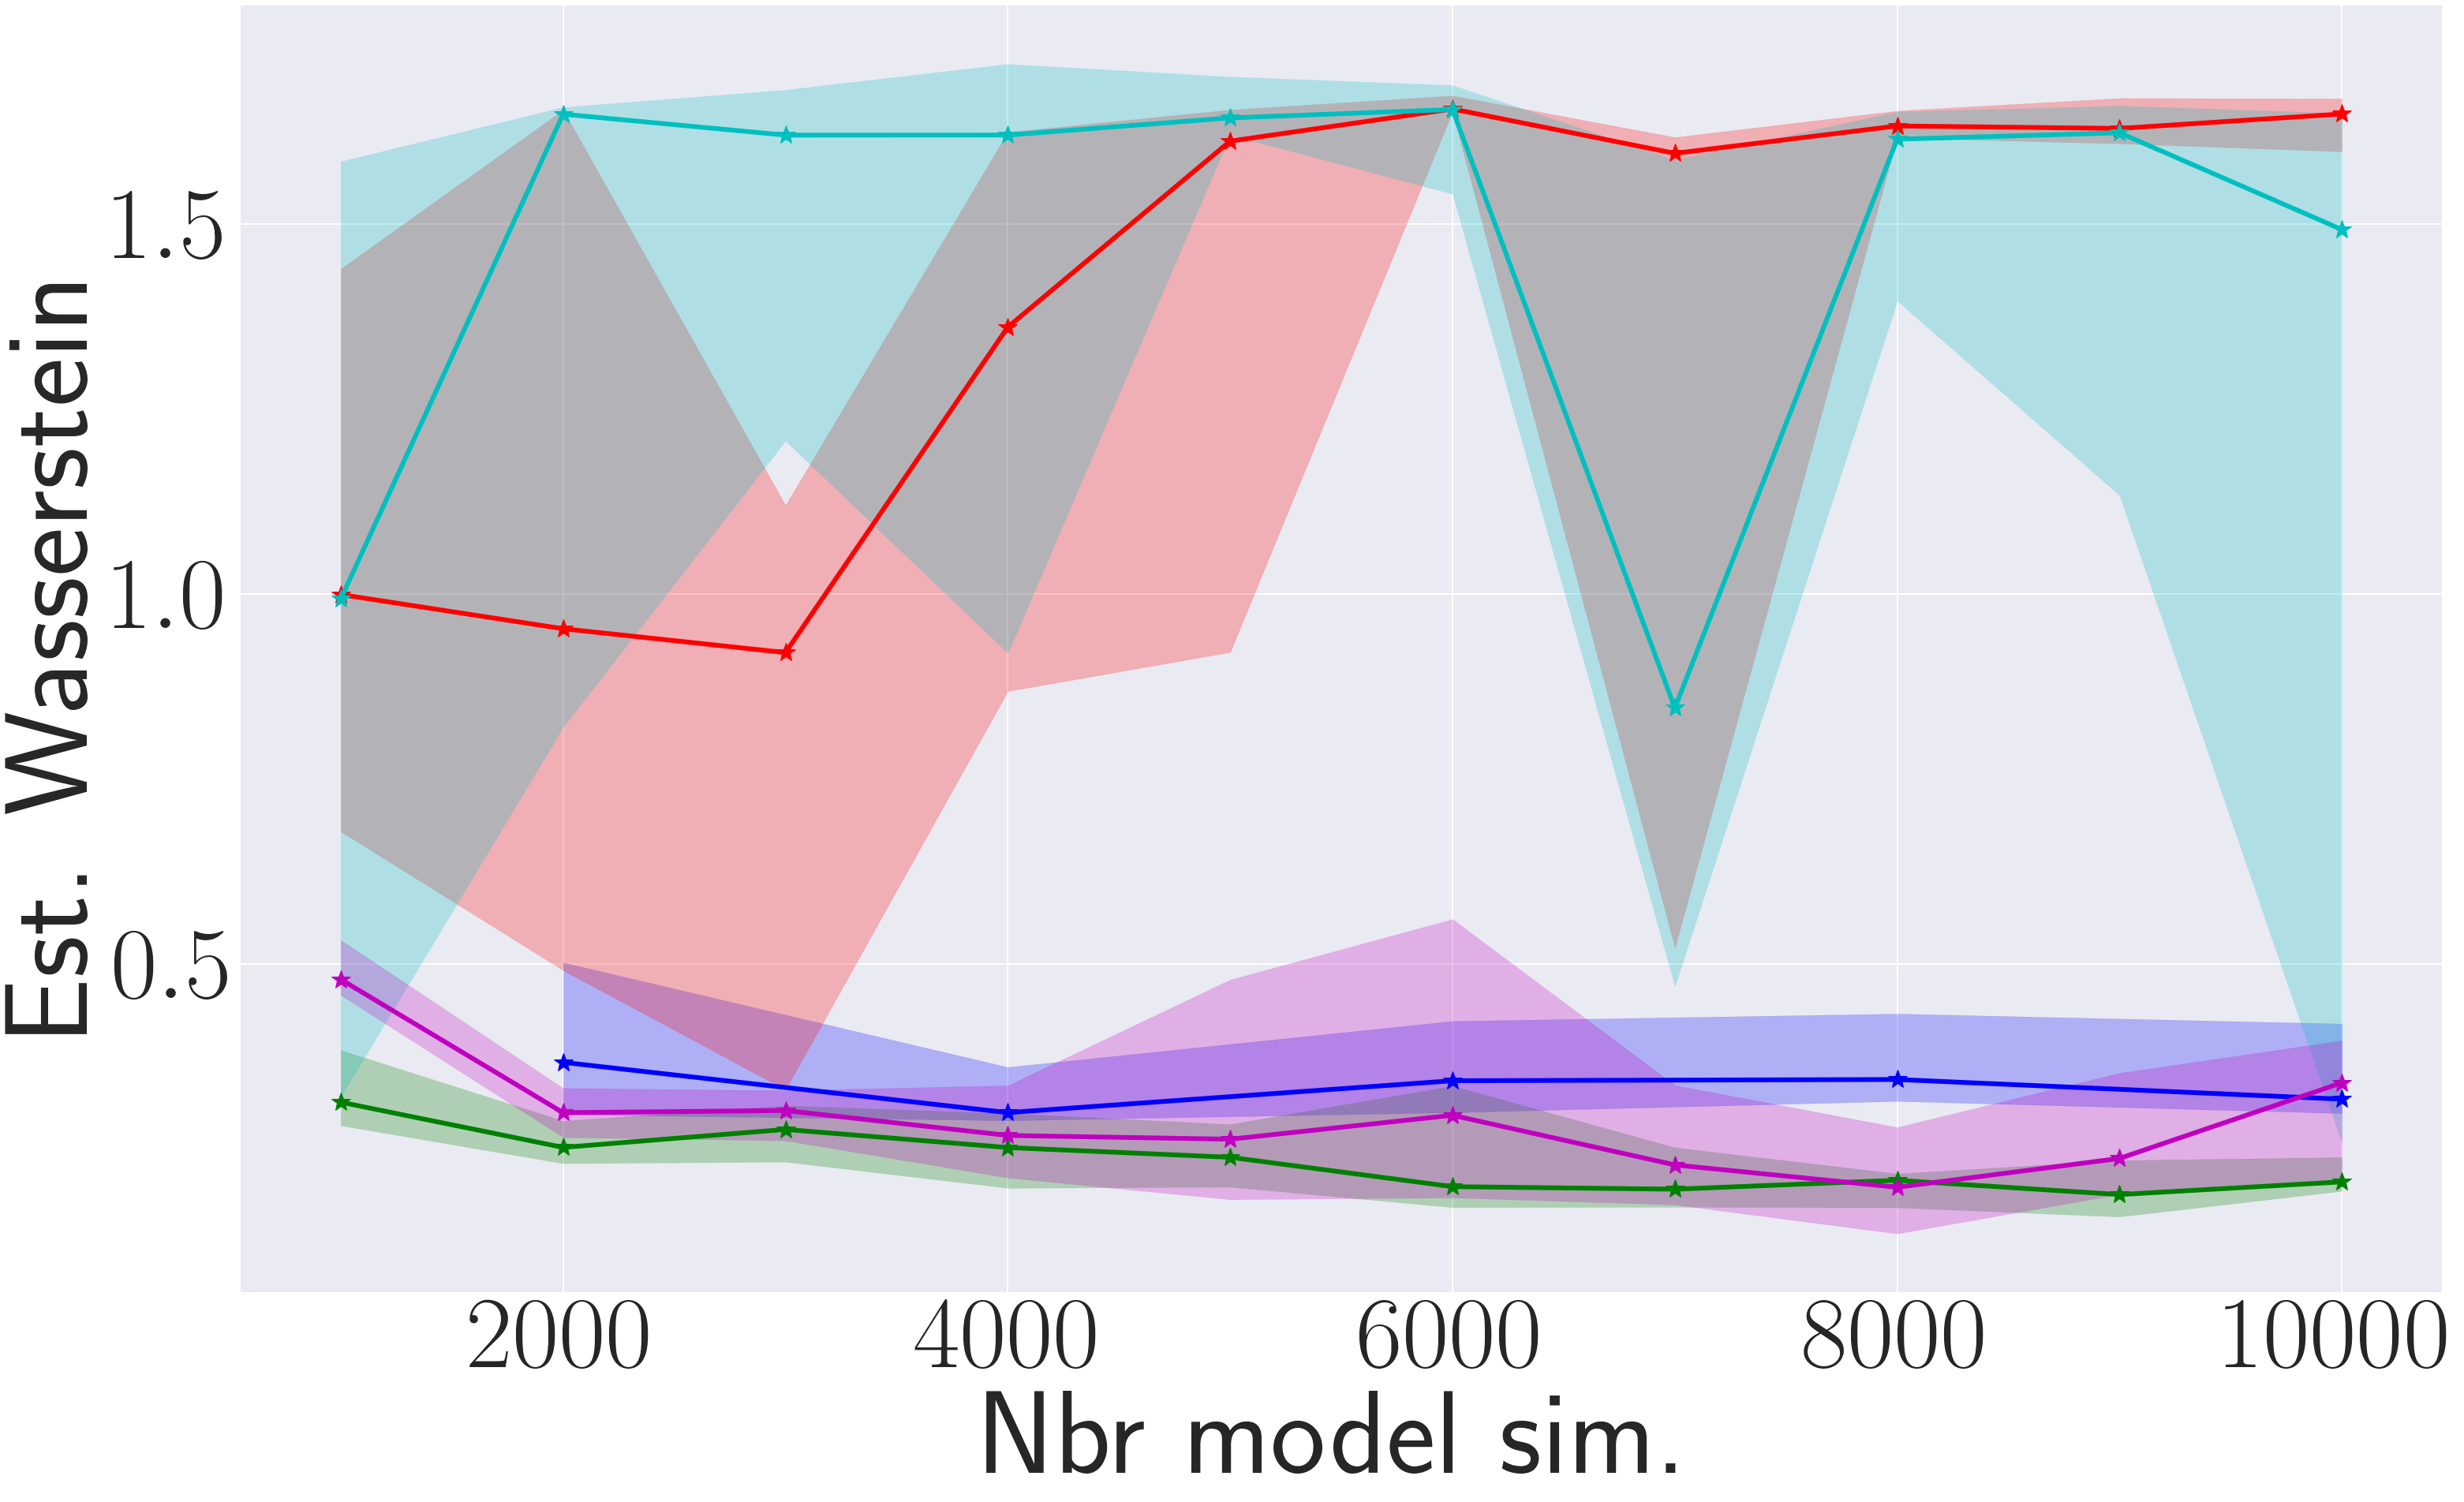

In [89]:
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
x_smc= [2000,4000,6000,8000,10000]
x_grid = [2000,4000,6000,8000,10000]

upper_q = 0.75
lower_q = 0.25

fig = plt.figure(figsize = (50,30))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_smc,np.median(smcabc_post_emd,axis=1), color = "b", marker = "*", 
          label='SMC-ABC', markersize=25, linewidth=6)
ax.fill_between(x_smc,np.quantile(smcabc_post_emd, [lower_q, upper_q],axis=1)[0,:],
                 np.quantile(smcabc_post_emd, [lower_q, upper_q],axis=1)[1,:], 
                 color ="b", alpha = 0.25)


ax.plot(x,np.median(snl_post_emd,axis=1), color = "r", marker = "*", label='SNL',
         markersize=25, linewidth=6)
ax.fill_between(x,np.quantile(snl_post_emd, [lower_q, upper_q],axis=1)[0,:],
                 np.quantile(snl_post_emd, [lower_q, upper_q],axis=1)[1,:],
                 color = "r", alpha = 0.25)

ax.plot(x,np.median(snpe_c_post_emd,axis=1), color = "g", marker = "*", label='SNPE-C',
         markersize=25, linewidth=6)
ax.fill_between(x,np.quantile(snpe_c_post_emd, [lower_q, upper_q],axis=1)[0,:],
                 np.quantile(snpe_c_post_emd, [lower_q, upper_q],axis=1)[1,:],
                 color = "g", alpha = 0.25)


ax.plot(x,np.median(snre_b_post_emd,axis=1), color = "c", marker = "*", label='SNRE-B',
         markersize=25, linewidth=6)
ax.fill_between(x,np.quantile(snre_b_post_emd, [lower_q, upper_q],axis=1)[0,:],
                 np.quantile(snre_b_post_emd, [lower_q, upper_q],axis=1)[1,:],
                 color = "c", alpha = 0.25)

ax.plot(x,np.median(snpla_post_emd,axis=1), color = "m", marker = "*", label='SNPLA',
         markersize=25, linewidth=6)
ax.fill_between(x,np.quantile(snpla_post_emd, [lower_q, upper_q],axis=1)[0,:],
                 np.quantile(snpla_post_emd, [lower_q, upper_q],axis=1)[1,:],
                 color = "m", alpha = 0.25)

#ax1.tick_params(axis='both', which='major', labelsize=15)
#ax1.xaxis.set_ticks(np.arange(1, 6, 1))

#ax.set_yscale("log")

ax.set_xticks(x_grid)
ax.grid(color='w', linestyle='-', linewidth=2)
ax.tick_params(axis='both', which='major', labelsize=130)
ax.tick_params(axis='both', which='minor', labelsize=130)
#ax.legend(prop={'size': 90}, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Est. Wasserstein", fontsize=150)
ax.set_xlabel("Nbr model sim.", fontsize=150)

plt.savefig("./two_moons/fig/post_est_emd.pdf", bbox_inches='tight')


In [40]:
snpla_post_emd_wo_failes = []

for i in range(nbr_rounds):
    snpla_post_emd_wo_failes.append(snpla_post_emd[i,np.where(snpla_post_emd[i,:] < 1)].mean().round(4))
    
print("snpla-Flow (without cases that failed): " + str(snpla_post_emd_wo_failes))

# why is it not decreasing??

snpla-Flow (without cases that failed): [0.3581, 0.2122, 0.2175, 0.2362, 0.3421]


In [41]:
sum(snl_post_emd[4,:]>3)

0

In [43]:
snl_post_emd[r-1,:]

array([1.64859332, 1.49901503, 1.01498741, 1.68456031, 1.62329132,
       1.58498773, 1.6447033 , 1.6199087 , 1.61728667, 1.60925483])

In [40]:
snpla_post_emd[r-1,:]

array([0.2061766 , 0.15711002, 0.17928197, 0.69692989, 0.29494856,
       1.59421574, 1.10188242, 1.64266814, 1.62879564, 0.51797567])

In [46]:
snpla_post_emd[:,7]

array([0.4905587 , 0.21095127, 1.49563785, 1.4014801 , 1.64266814])

In [47]:
snpla_post_emd[:,8]

array([0.31864101, 1.56989607, 1.66050748, 1.643139  , 1.62879564])

In [48]:
snpla_post_emd[:,0]

array([0.40488788, 0.23211271, 0.3835455 , 0.22992357, 0.2061766 ])

In [49]:
snpla_post_emd[:,6]

array([0.32647485, 0.22567474, 0.20808606, 1.21225042, 1.10188242])

(0.0, 5.0)

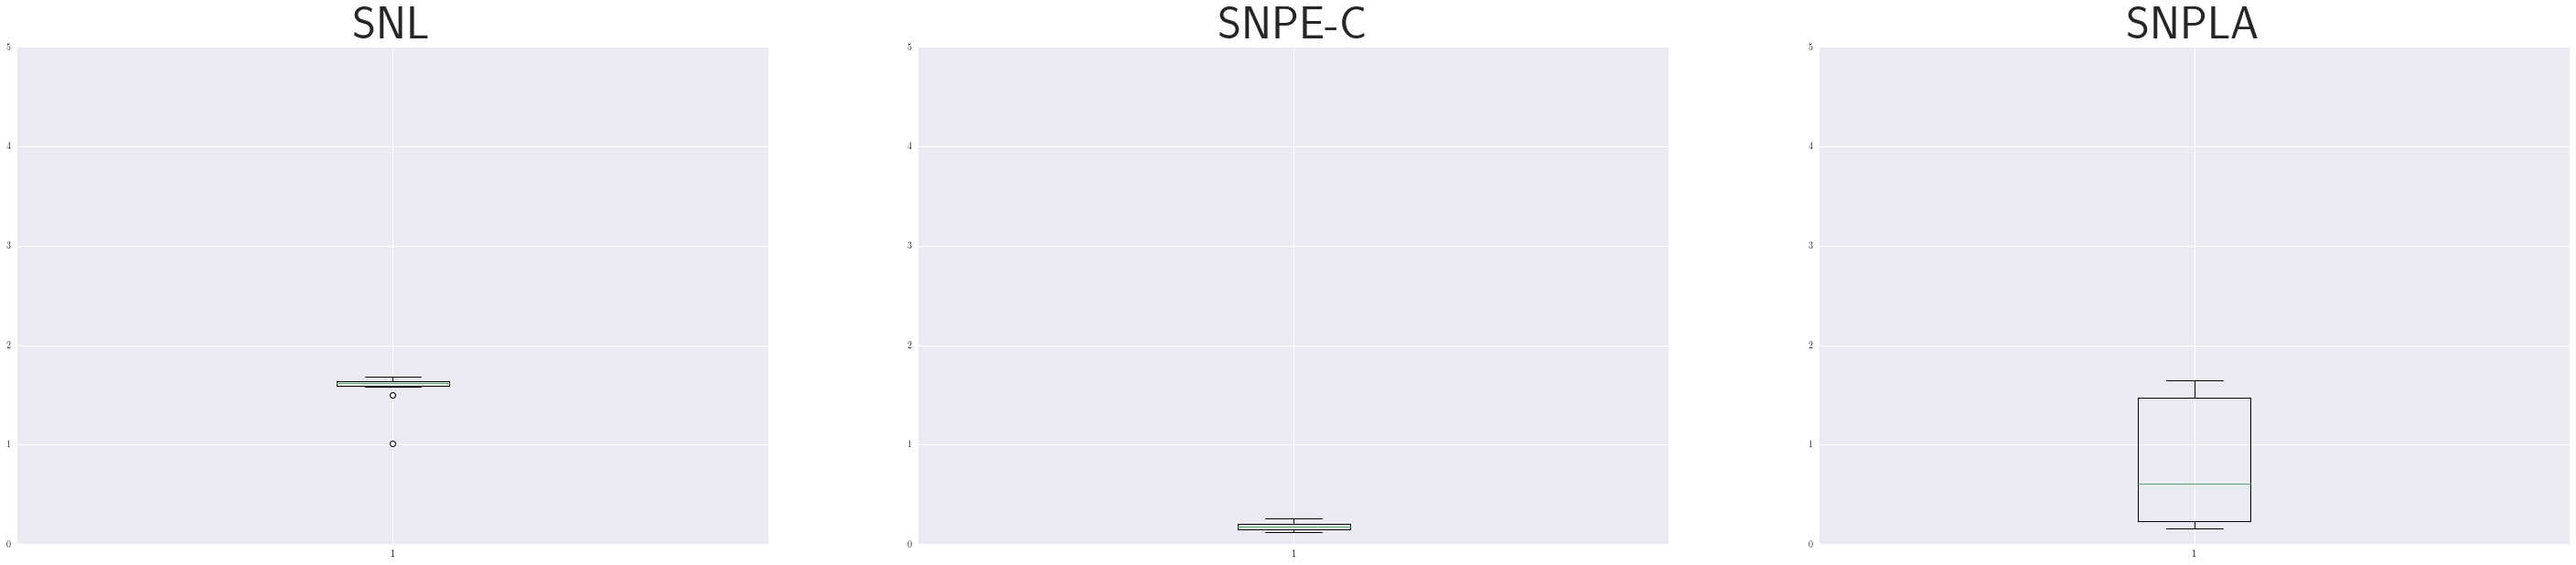

In [39]:
# deprecated
r = 5 # round 

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snl_post_emd[r-1,:])
ax2.boxplot(snpe_c_post_emd[r-1,:])
ax3.boxplot(snpla_post_emd[r-1,:])


ax1.set_title("SNL",fontsize=50)
ax2.set_title("SNPE-C",fontsize=50)
ax3.set_title("SNPLA",fontsize=50)

ax1.set_ylim([0,5])
ax2.set_ylim([0,5])
ax3.set_ylim([0,5])

(0.0, 5.0)

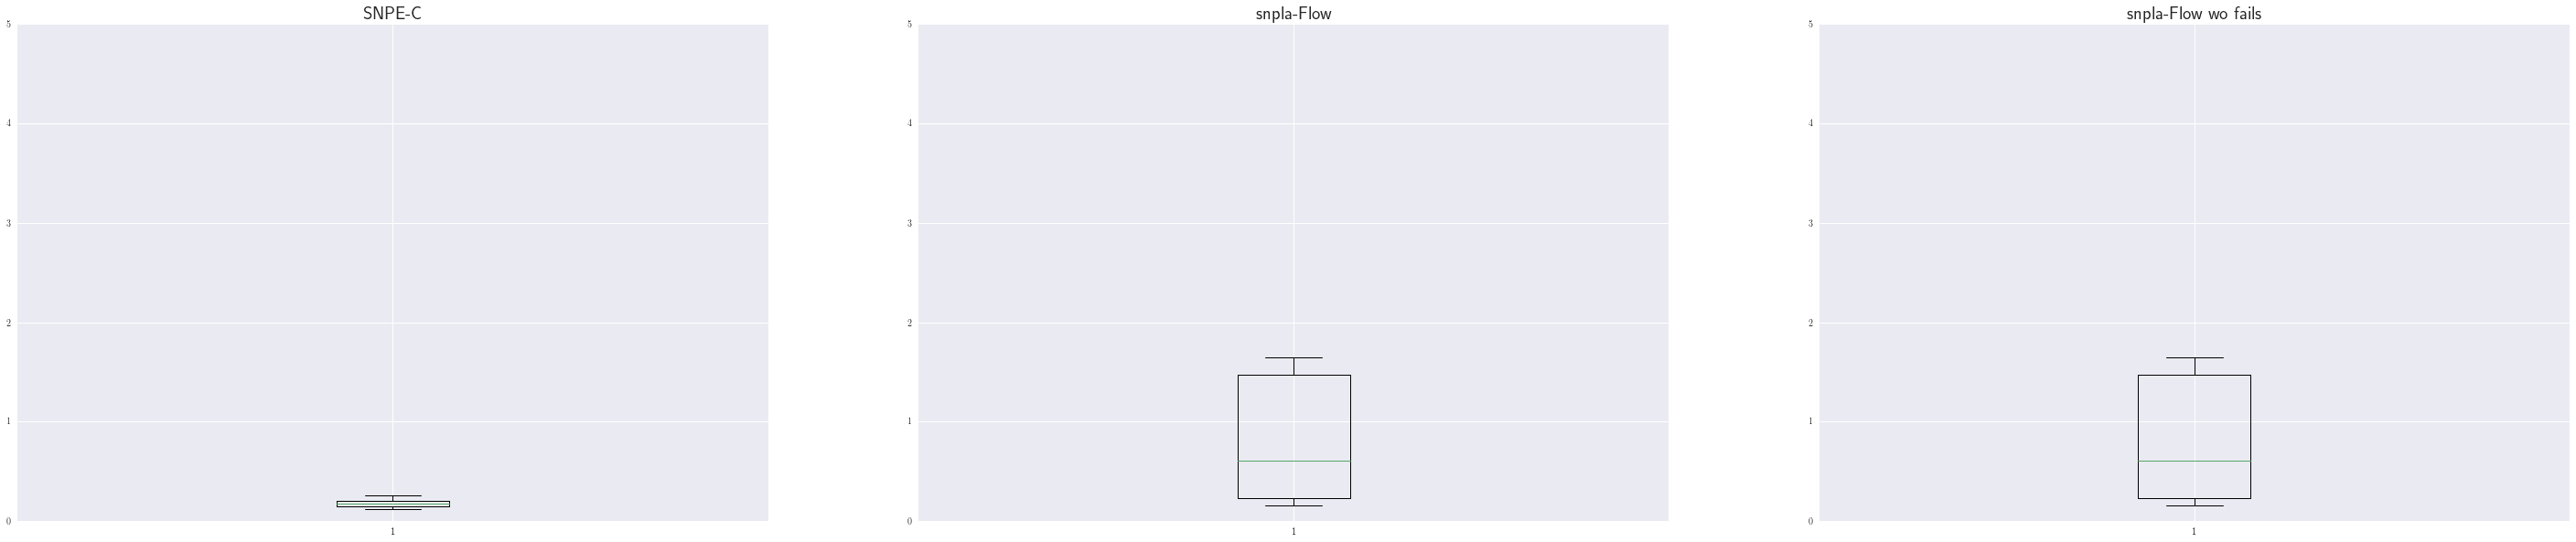

In [46]:
# deprecated

r = 5 # round 

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snpe_c_post_emd[r-1,:])
ax2.boxplot(snpla_post_emd[r-1,:])
ax3.boxplot(snpla_post_emd[r-1,np.where(snpla_post_emd[r-1,:] < 2)].reshape(-1))


ax1.set_title("SNPE-C",fontsize=20)
ax2.set_title("snpla-Flow",fontsize=20)
ax3.set_title("snpla-Flow wo fails",fontsize=20)

ax1.set_ylim([0,5])
ax2.set_ylim([0,5])
ax3.set_ylim([0,5])


In [46]:
# deprecated

r = 4 # round 

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snpe_c_post_emd[r-1,:])
ax2.boxplot(snpla_post_emd[r-1,:])
ax3.boxplot(snpla_post_emd[r-1,np.where(snpla_post_emd[r-1,:] < 2)].reshape(-1))


ax1.set_title("SNPE-C",fontsize=20)
ax2.set_title("snpla-Flow",fontsize=20)
ax3.set_title("snpla-Flow wo fails",fontsize=20)

ax1.set_ylim([0,3])
ax2.set_ylim([0,3])
ax3.set_ylim([0,3])

(0, 3)

(0, 3)

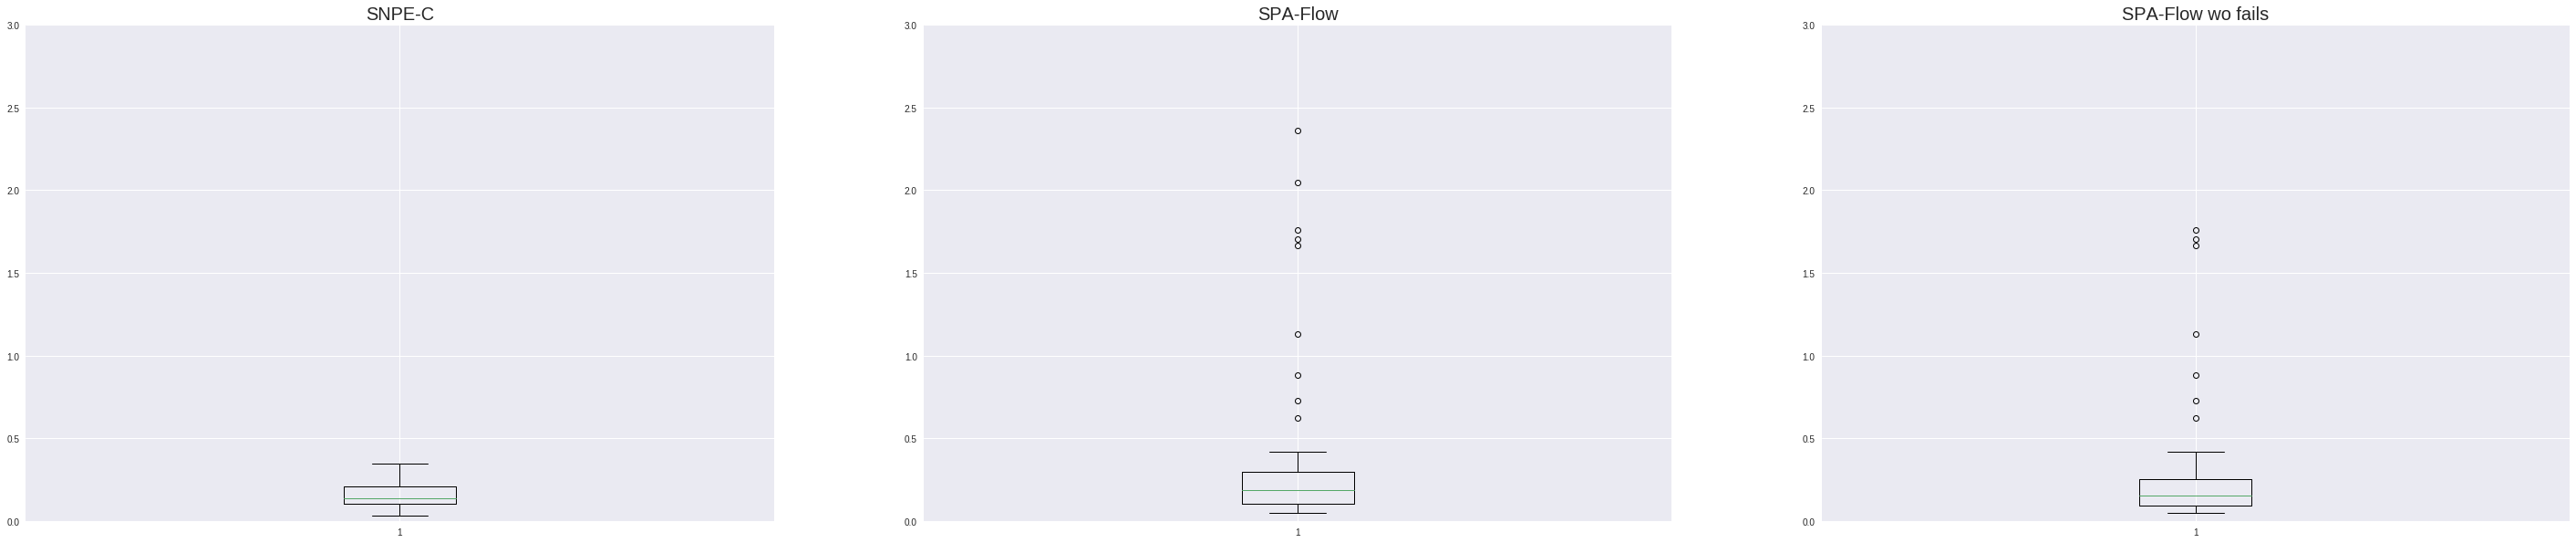

In [47]:

# deprecated

r = 3 # round 

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snpe_c_post_emd[r-1,:])
ax2.boxplot(snpla_post_emd[r-1,:])
ax3.boxplot(snpla_post_emd[r-1,np.where(snpla_post_emd[r-1,:] < 2)].reshape(-1))


ax1.set_title("SNPE-C",fontsize=20)
ax2.set_title("snpla-Flow",fontsize=20)
ax3.set_title("snpla-Flow wo fails",fontsize=20)

ax1.set_ylim([0,3])
ax2.set_ylim([0,3])
ax3.set_ylim([0,3])

In [48]:
r = 2 # round 
# deprecated

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snpe_c_post_emd[r-1,:])
ax2.boxplot(snpla_post_emd[r-1,:])
ax3.boxplot(snpla_post_emd[r-1,np.where(snpla_post_emd[r-1,:] < 2)].reshape(-1))


ax1.set_title("SNPE-C",fontsize=20)
ax2.set_title("snpla-Flow",fontsize=20)
ax3.set_title("snpla-Flow wo fails",fontsize=20)

ax1.set_ylim([0,3])
ax2.set_ylim([0,3])
ax3.set_ylim([0,3])

(0, 3)

(0, 3)

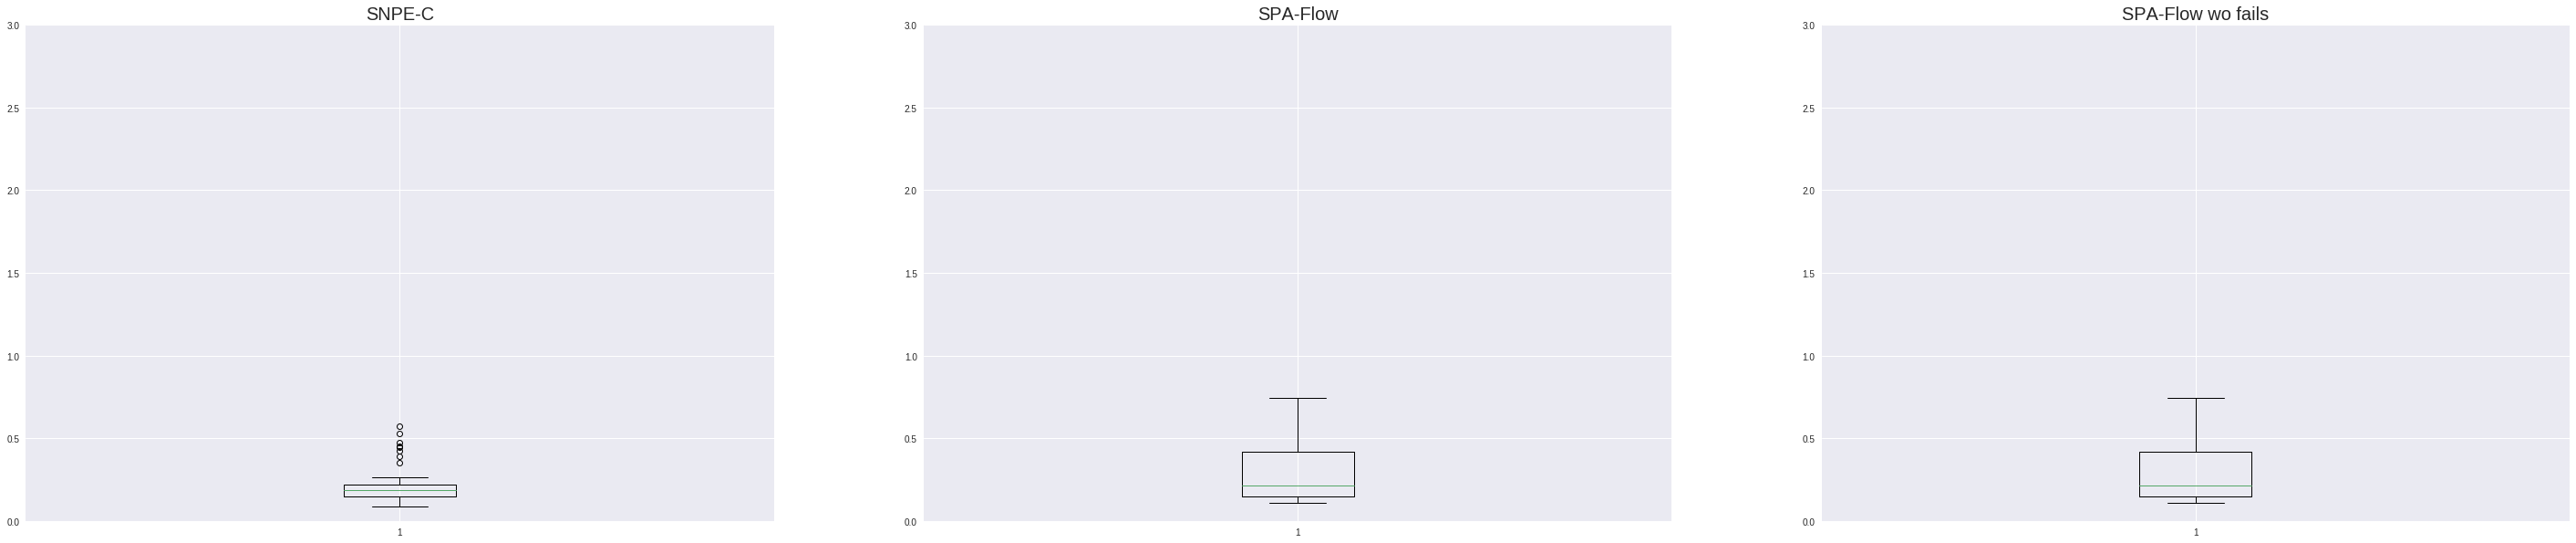

In [49]:
r = 1 # round 
# deprecated

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snpe_c_post_emd[r-1,:])
ax2.boxplot(snpla_post_emd[r-1,:])
ax3.boxplot(snpla_post_emd[r-1,np.where(snpla_post_emd[r-1,:] < 2)].reshape(-1))

ax1.set_title("SNPE-C",fontsize=20)
ax2.set_title("snpla-Flow",fontsize=20)
ax3.set_title("snpla-Flow wo fails",fontsize=20)

ax1.set_ylim([0,3])
ax2.set_ylim([0,3])
ax3.set_ylim([0,3])

### Plotting - posterior

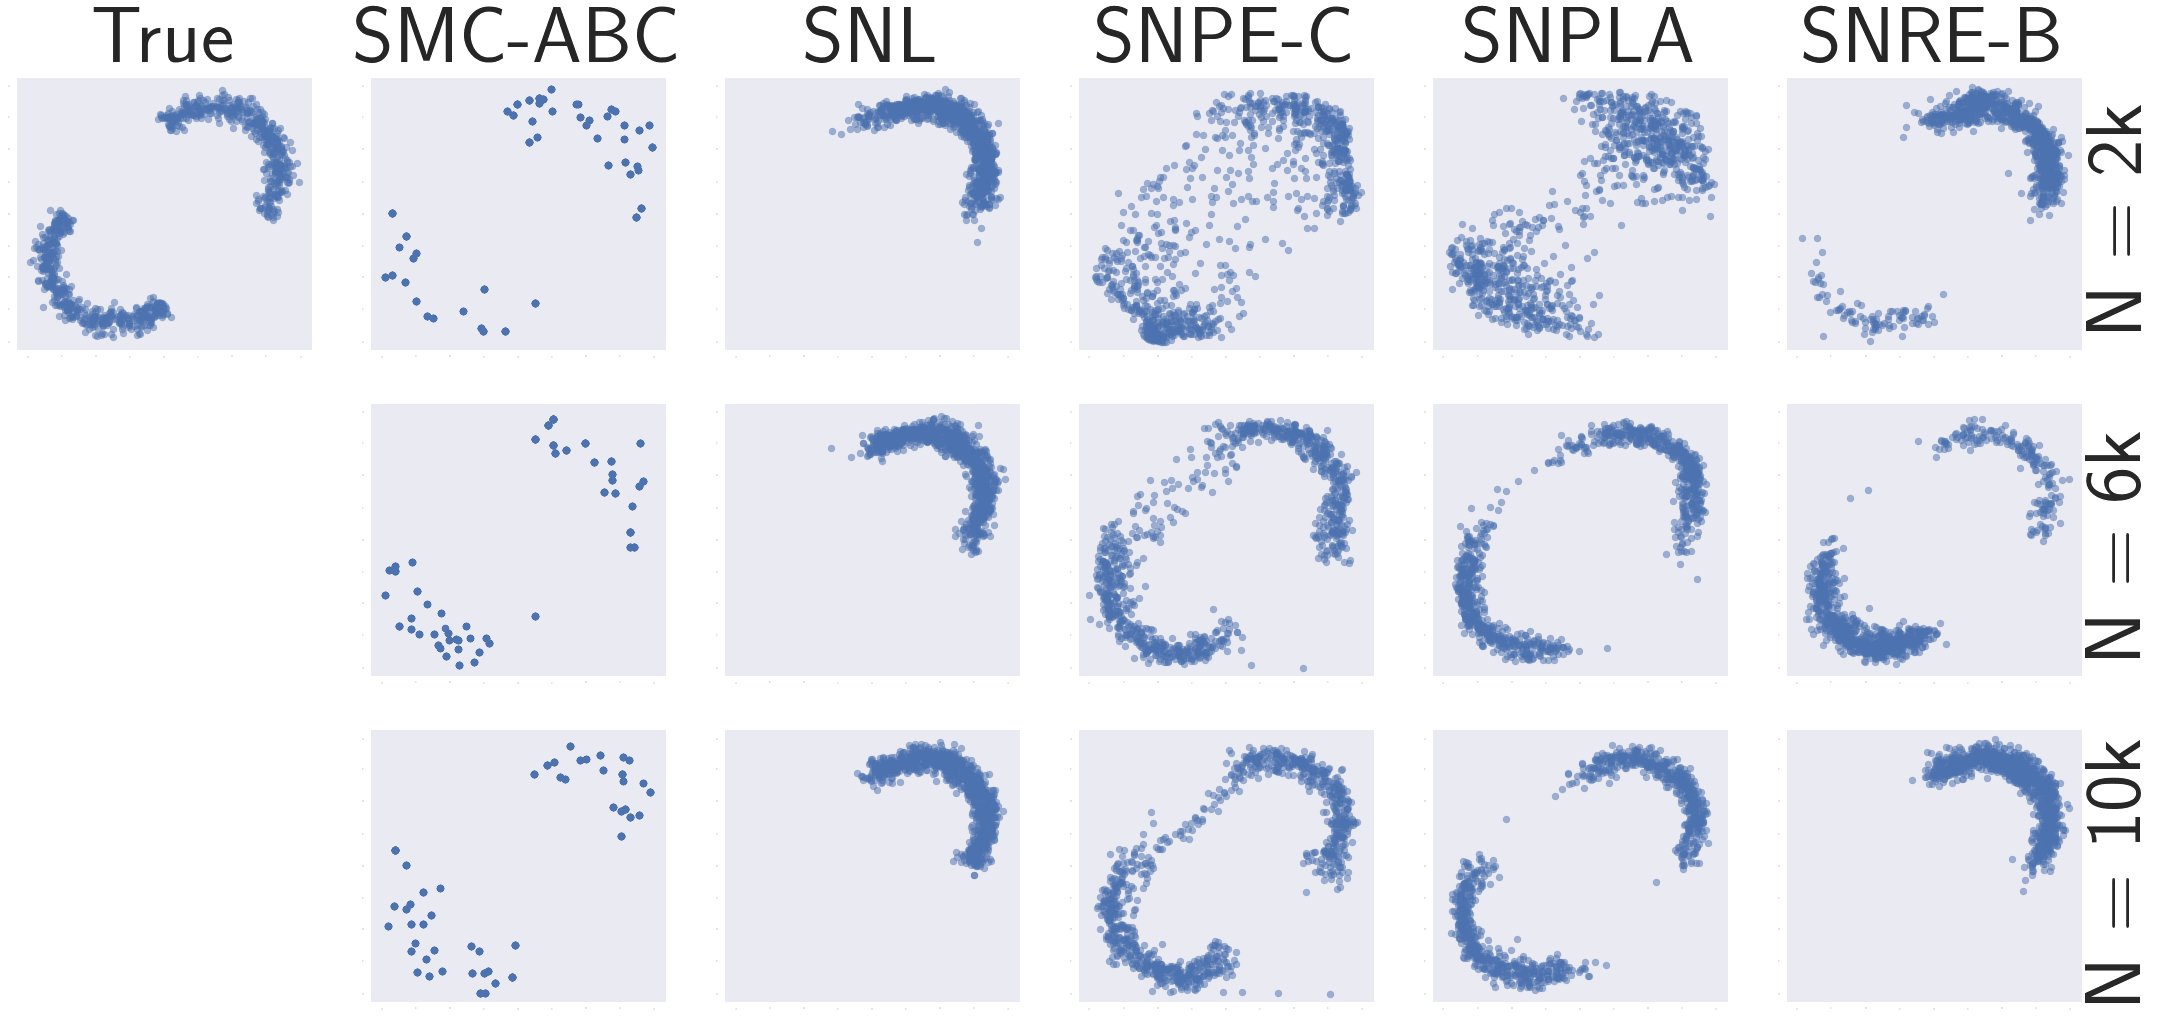

In [91]:
# plotting

import matplotlib.gridspec as gridspec

data_set = 8 

fig = plt.figure()
fig.set_figheight(17)
fig.set_figwidth(37)

# frist row 
ax1 = fig.add_subplot(3, 6, 1)
ax2 = fig.add_subplot(3, 6, 2)
ax3 = fig.add_subplot(3, 6, 3)
ax4 = fig.add_subplot(3, 6, 4)
ax5 = fig.add_subplot(3, 6, 5)
ax6 = fig.add_subplot(3, 6, 6)

ax7 = fig.add_subplot(3, 6, 8)
ax8 = fig.add_subplot(3, 6, 9)
ax9 = fig.add_subplot(3, 6, 10)
ax10 = fig.add_subplot(3, 6, 11)
ax11 = fig.add_subplot(3, 6, 12)

ax12 = fig.add_subplot(3, 6, 14)
ax13 = fig.add_subplot(3, 6, 15)
ax14 = fig.add_subplot(3, 6, 16)
ax15 = fig.add_subplot(3, 6, 17)
ax16 = fig.add_subplot(3, 6, 18)

ax1.scatter(analytical_post[:,0],analytical_post[:,1],alpha = 0.5)

ax2.scatter(smcabc_post[0][data_set][:,0],smcabc_post[0][data_set][:,1], alpha = 0.5)
ax3.scatter(snl_post[1][data_set][:,0],snl_post[1][data_set][:,1], alpha = 0.5)
ax4.scatter(snpe_c_post[1][data_set][:,0],snpe_c_post[1][data_set][:,1], alpha = 0.5)
ax6.scatter(snre_b_post[1][data_set][:,0],snre_b_post[1][data_set][:,1], alpha = 0.5)
ax5.scatter(snpla_post[1][data_set][:,0],snpla_post[1][data_set][:,1], alpha = 0.5)

ax7.scatter(smcabc_post[2][data_set][:,0],smcabc_post[2][data_set][:,1], alpha = 0.5)
ax8.scatter(snl_post[5][data_set][:,0],snl_post[5][data_set][:,1], alpha = 0.5)
ax9.scatter(snpe_c_post[5][data_set][:,0],snpe_c_post[5][data_set][:,1], alpha = 0.5)
ax11.scatter(snre_b_post[5][data_set][:,0],snre_b_post[5][data_set][:,1], alpha = 0.5)
ax10.scatter(snpla_post[5][data_set][:,0],snpla_post[5][data_set][:,1], alpha = 0.5)

ax12.scatter(smcabc_post[-1][data_set][:,0],smcabc_post[-1][data_set][:,1], alpha = 0.5)
ax13.scatter(snl_post[-1][data_set][:,0],snl_post[-1][data_set][:,1], alpha = 0.5)
ax14.scatter(snpe_c_post[-1][data_set][:,0],snpe_c_post[-1][data_set][:,1], alpha = 0.5)
ax16.scatter(snre_b_post[-1][data_set][:,0],snre_b_post[-1][data_set][:,1], alpha = 0.5)
ax15.scatter(snpla_post[-1][data_set][:,0],snpla_post[-1][data_set][:,1], alpha = 0.5)

ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())

ax3.set_xlim(ax1.get_xlim())
ax3.set_ylim(ax1.get_ylim())

ax4.set_xlim(ax1.get_xlim())
ax4.set_ylim(ax1.get_ylim())

ax5.set_xlim(ax1.get_xlim())
ax5.set_ylim(ax1.get_ylim())

ax6.set_xlim(ax1.get_xlim())
ax6.set_ylim(ax1.get_ylim())

ax7.set_xlim(ax1.get_xlim())
ax7.set_ylim(ax1.get_ylim())

ax8.set_xlim(ax1.get_xlim())
ax8.set_ylim(ax1.get_ylim())

ax9.set_xlim(ax1.get_xlim())
ax9.set_ylim(ax1.get_ylim())

ax10.set_xlim(ax1.get_xlim())
ax10.set_ylim(ax1.get_ylim())

ax11.set_xlim(ax1.get_xlim())
ax11.set_ylim(ax1.get_ylim())

ax12.set_xlim(ax1.get_xlim())
ax12.set_ylim(ax1.get_ylim())

ax13.set_xlim(ax1.get_xlim())
ax13.set_ylim(ax1.get_ylim())

ax14.set_xlim(ax1.get_xlim())
ax14.set_ylim(ax1.get_ylim())

ax15.set_xlim(ax1.get_xlim())
ax15.set_ylim(ax1.get_ylim())

ax16.set_xlim(ax1.get_xlim())
ax16.set_ylim(ax1.get_ylim())

ax1.set_title("True",fontsize=80)
ax2.set_title("SMC-ABC",fontsize=80)
ax3.set_title("SNL",fontsize=80)
ax4.set_title("SNPE-C",fontsize=80)
ax6.set_title("SNRE-B",fontsize=80)
ax5.set_title("SNPLA",fontsize=80)


ax6.set_ylabel(r'N = 2k',fontsize=80)
ax6.yaxis.set_label_position("right")

ax11.set_ylabel(r'N = 6k',fontsize=80)
ax11.yaxis.set_label_position("right")

ax16.set_ylabel(r'N = 10k',fontsize=80)
ax16.yaxis.set_label_position("right")

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13 , ax14,
          ax15, ax16]:
    
    ax.tick_params(axis='y', which='major', labelsize=0)
    ax.tick_params(axis='y', which='minor', labelsize=0)

    ax.tick_params(axis='x', which='major', labelsize=0)
    ax.tick_params(axis='x', which='minor', labelsize=0)

    ax.grid(False)
    
plt.savefig("./two_moons/fig/post_samples_" + str(data_set) + ".pdf", 
            bbox_inches="tight")


### Calc emd for post pred and plot post pred

In [79]:
snl_post_pred_emd = np.zeros((seed_max))

for j in range(seed_max):
    snl_post_pred_emd[j] = calc_emd(analytical_post_pred,snl_post_pred[j])     

In [80]:
snpla_post_pred_emd = np.zeros((nbr_rounds,seed_max))

for i in range(nbr_rounds):
    print(i)
    for j in range(seed_max):
        snpla_post_pred_emd[i,j] = calc_emd(analytical_post_pred,snpla_post_pred[i][j])         

0
1
2
3
4
5
6
7
8
9


In [81]:
print("SNL: " + str(snl_post_pred_emd.mean().round(4)))
print("snpla-Flow: " + str(snpla_post_pred_emd.mean(axis=1).round(4)))


SNL: 0.1216
snpla-Flow: [0.3304 0.225  0.2211 0.1787 0.1341 0.1289 0.1348 0.1239 0.1244 0.1206]


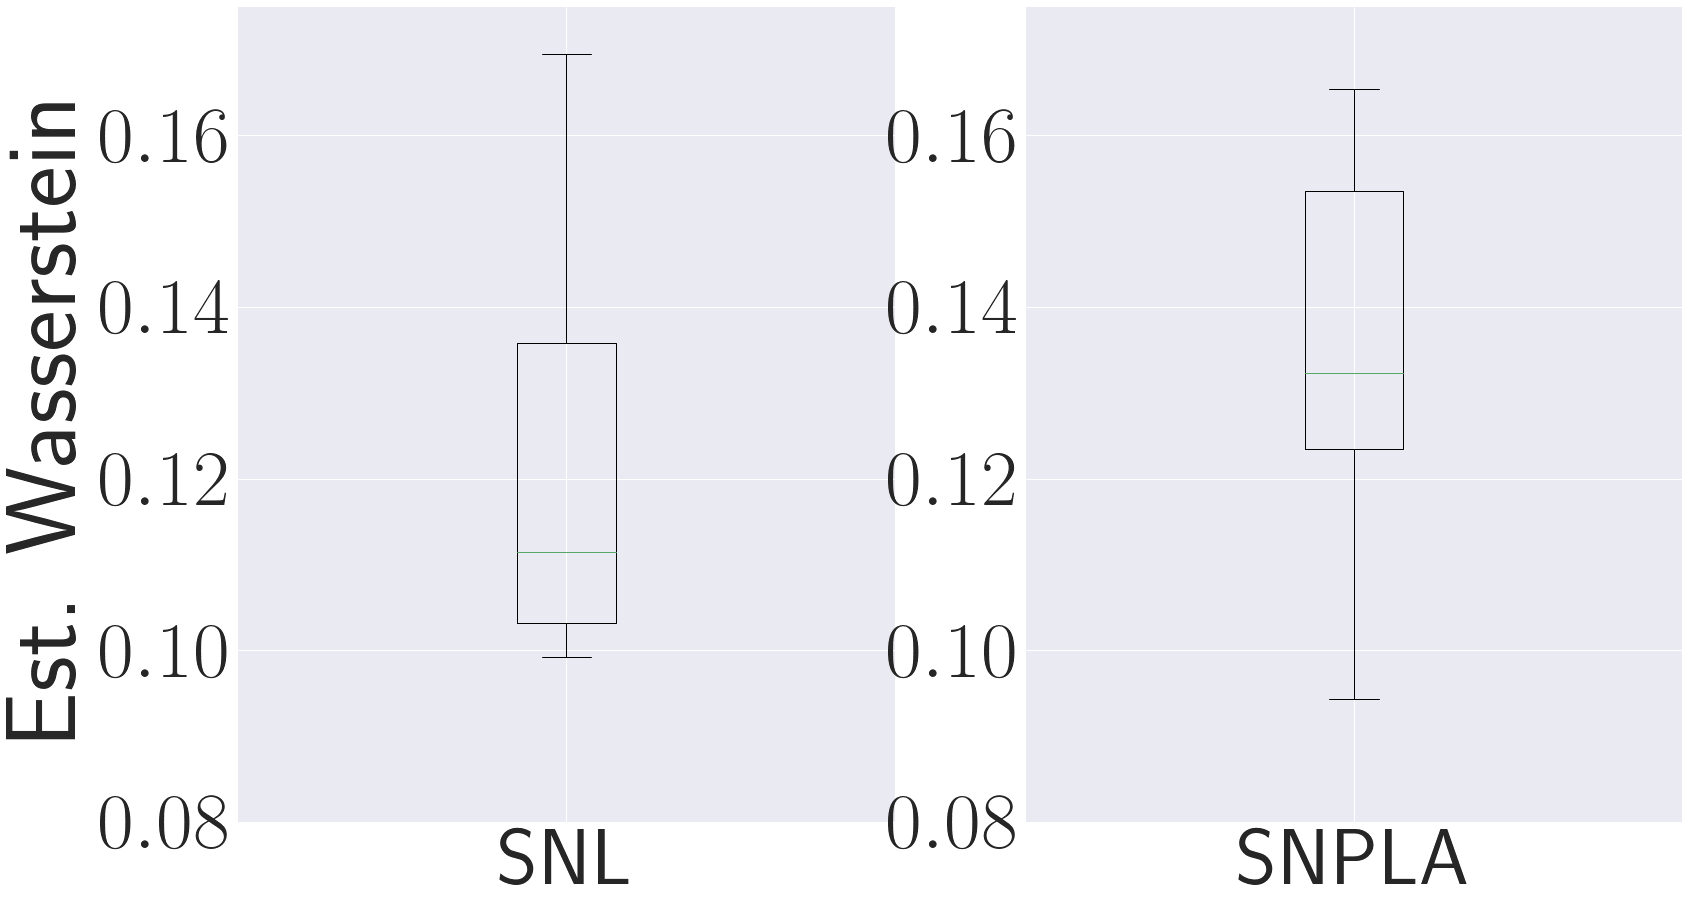

In [82]:
r = 5 # round 

fig = plt.figure(figsize = (40,15))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)

ax1.boxplot(snl_post_pred_emd[:], labels = ["SNL"])
ax2.boxplot(snpla_post_pred_emd[r-1,:], labels = ["SNPLA"])

#ax1.set_title("SNL",fontsize=60)
#ax2.set_title("SNPLA",fontsize=60)

ax1.set_ylim([0.08,0.175])
ax2.set_ylim([0.08,0.175])

ax1.tick_params(axis='both', which='major', labelsize=80)
ax1.tick_params(axis='both', which='minor', labelsize=70)

ax2.tick_params(axis='both', which='major', labelsize=80)
ax2.tick_params(axis='both', which='minor', labelsize=70)

ax1.set_ylabel("Est. Wasserstein", fontsize=100)


plt.savefig("./two_moons/fig/post_pred_emd_" + str(data_set) + "_.pdf",bbox_inches='tight')



In [85]:
np.quantile(snl_post_pred_emd[:], [0.5, 0.25, 0.75]).round(3)

array([0.111, 0.103, 0.136])

In [86]:
np.quantile(snpla_post_pred_emd[r-1,:], [0.5, 0.25, 0.75]).round(3)

array([0.132, 0.123, 0.154])

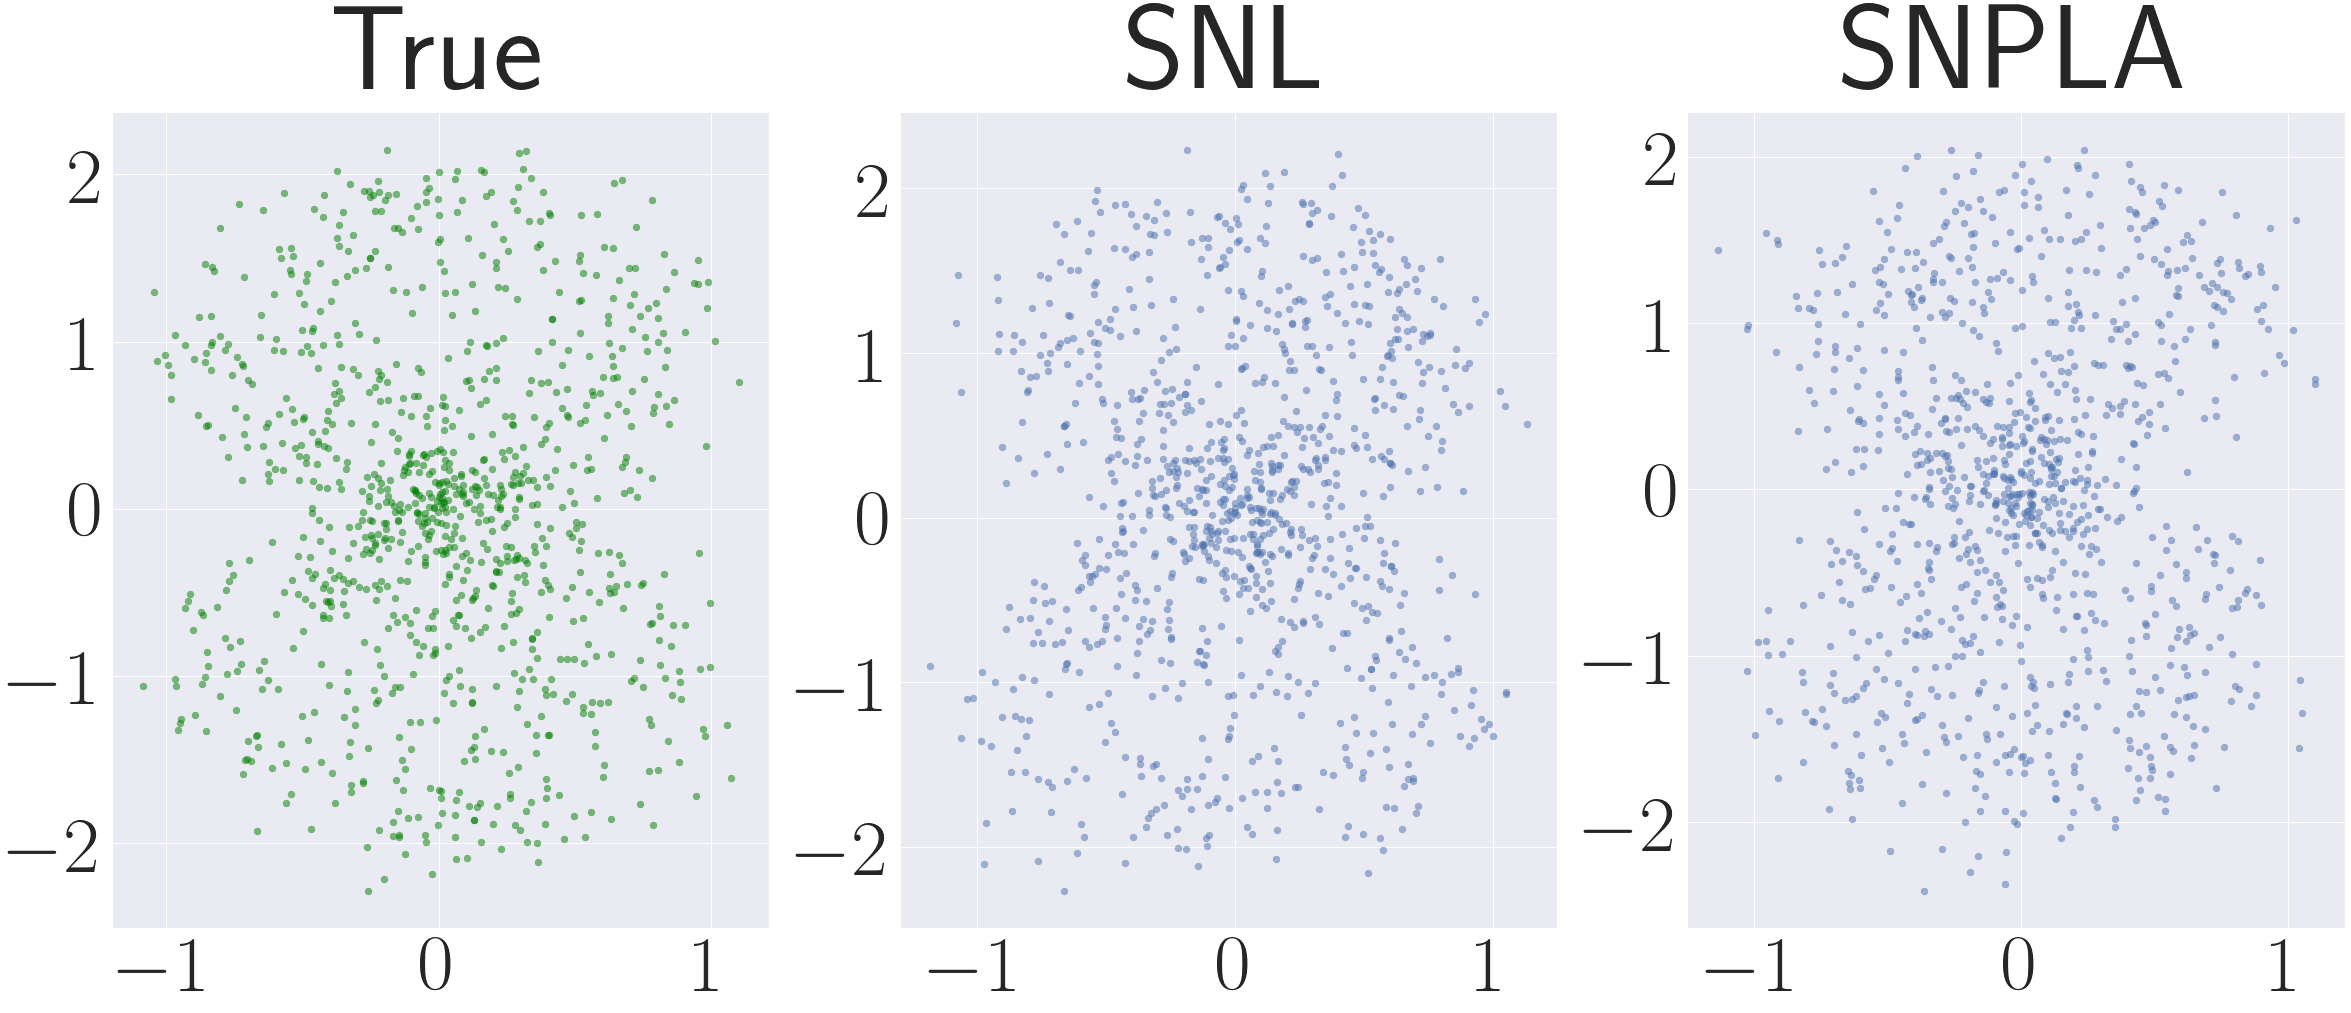

In [61]:
# plotting
data_set = 0

fig = plt.figure(figsize = (40,15))

# frist row 
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


ax1.scatter(analytical_post_pred[:,0],analytical_post_pred[:,1],color = "g", alpha = 0.5)
ax2.scatter(snl_post_pred[data_set][:,0],snl_post_pred[data_set][:,1], alpha = 0.5)
ax3.scatter(snpla_post_pred[4][data_set][:,0],snpla_post_pred[4][data_set][:,1], alpha = 0.5)


ax1.tick_params(axis='both', which='major', labelsize=80)
ax1.tick_params(axis='both', which='minor', labelsize=70)

ax2.tick_params(axis='both', which='major', labelsize=80)
ax2.tick_params(axis='both', which='minor', labelsize=70)

ax3.tick_params(axis='both', which='major', labelsize=80)
ax3.tick_params(axis='both', which='minor', labelsize=70)

ax1.set_title("True",fontsize=120)
ax2.set_title("SNL",fontsize=120)
ax3.set_title("SNPLA",fontsize=120)

plt.savefig("./two_moons/fig/post_pred_samples_" + str(data_set) + "_.pdf",bbox_inches='tight')

